# 1. Previsão de cancelamentos em Hotéis
Você foi contratado pela DHAUZ como cientista de dados para analisar uma base de dados de clientes
de uma rede de Hotéis e sua tarefa é investigar os dados em busca de insights que possam ajudar a
empresa a evitar cancelamentos e também construir um modelo preditivo que possa antecipar esses
cancelamentos, de modo que a empresa tenha tempo hábil para agir com ações de retenção.

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import random
import matplotlib.pyplot as plt
import scipy.stats as stats 
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from IPython.display import Image

## a)  Elabore hipóteses e visualizações envolvendo a variável cancellation e, pelo menos, outras duas variáveis presentes no dataset; 

### a.1) Análise inicial dos dados

In [48]:
df = pd.read_csv("cancellation_prediction.csv")
df.head(5)

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,NaN,NaN,0,0.0,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,NaN,NaN,0,0.0,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,NaN,NaN,0,75.0,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,304.0,NaN,0,75.0,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240.0,NaN,0,98.0,0,1


In [49]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
cancellation,119390.0,0.37,0.48,0.0,0.00,0.00,1.0,1.0
days_between_booking_arrival,119390.0,104.01,106.86,0.0,18.00,69.00,160.0,737.0
year_arrival_date,119390.0,2016.16,0.71,2015.0,2016.00,2016.00,2017.0,2017.0
week_number_arrival_date,119390.0,27.17,13.61,1.0,16.00,28.00,38.0,53.0
day_of_month_arrival_date,119390.0,15.80,8.78,1.0,8.00,16.00,23.0,31.0
num_weekend_nights,119390.0,0.93,1.00,0.0,0.00,1.00,2.0,19.0
num_workweek_nights,119390.0,2.50,1.91,0.0,1.00,2.00,3.0,50.0
num_adults,119390.0,1.86,0.58,0.0,2.00,2.00,2.0,55.0
num_children,119386.0,0.10,0.40,0.0,0.00,0.00,0.0,10.0
num_babies,119390.0,0.01,0.10,0.0,0.00,0.00,0.0,10.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   type                             119390 non-null  object 
 1   cancellation                     119390 non-null  int64  
 2   days_between_booking_arrival     119390 non-null  int64  
 3   year_arrival_date                119390 non-null  int64  
 4   month_arrival_date               119390 non-null  object 
 5   week_number_arrival_date         119390 non-null  int64  
 6   day_of_month_arrival_date        119390 non-null  int64  
 7   num_weekend_nights               119390 non-null  int64  
 8   num_workweek_nights              119390 non-null  int64  
 9   num_adults                       119390 non-null  int64  
 10  num_children                     119386 non-null  float64
 11  num_babies                       119390 non-null  int64  
 12  br

In [51]:
#Matriz de correlação
df.corr().round(3)

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,...,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
cancellation,1.000,0.293,0.017,0.008,-0.006,-0.002,0.025,0.060,0.005,-0.032,...,-0.085,0.110,-0.057,-0.144,-0.083,-0.021,-0.136,0.049,-0.195,-0.235
days_between_booking_arrival,0.293,1.000,0.040,0.127,0.002,0.086,0.166,0.120,-0.038,-0.021,...,-0.124,0.086,-0.074,0.000,-0.070,0.151,0.163,-0.066,-0.116,-0.096
year_arrival_date,0.017,0.040,1.000,-0.541,-0.000,0.021,0.031,0.030,0.055,-0.013,...,0.010,-0.120,0.029,0.031,0.063,0.259,-0.200,0.208,-0.014,0.109
week_number_arrival_date,0.008,0.127,-0.541,1.000,0.067,0.018,0.016,0.026,0.006,0.010,...,-0.030,0.036,-0.021,0.006,-0.031,-0.077,0.064,0.080,0.002,0.026
day_of_month_arrival_date,-0.006,0.002,-0.000,0.067,1.000,-0.016,-0.028,-0.002,0.015,-0.000,...,-0.006,-0.027,-0.000,0.011,0.001,0.045,0.003,0.031,0.009,0.003
num_weekend_nights,-0.002,0.086,0.021,0.018,-0.016,1.000,0.499,0.092,0.046,0.018,...,-0.087,-0.013,-0.043,0.063,0.141,0.067,-0.043,0.053,-0.019,0.073
num_workweek_nights,0.025,0.166,0.031,0.016,-0.028,0.499,1.000,0.093,0.044,0.020,...,-0.097,-0.014,-0.049,0.096,0.182,0.182,-0.038,0.069,-0.025,0.068
num_adults,0.060,0.120,0.030,0.026,-0.002,0.092,0.093,1.000,0.030,0.018,...,-0.146,-0.007,-0.108,-0.052,-0.036,0.208,-0.094,0.242,0.015,0.123
num_children,0.005,-0.038,0.055,0.006,0.015,0.046,0.044,0.030,1.000,0.024,...,-0.033,-0.025,-0.021,0.049,0.041,0.031,-0.096,0.340,0.056,0.082
num_babies,-0.032,-0.021,-0.013,0.010,-0.000,0.018,0.020,0.018,0.024,1.000,...,-0.009,-0.008,-0.007,0.083,0.036,0.019,-0.022,0.031,0.037,0.098


[Text(0.5, 1.0, 'Mapa de calor')]

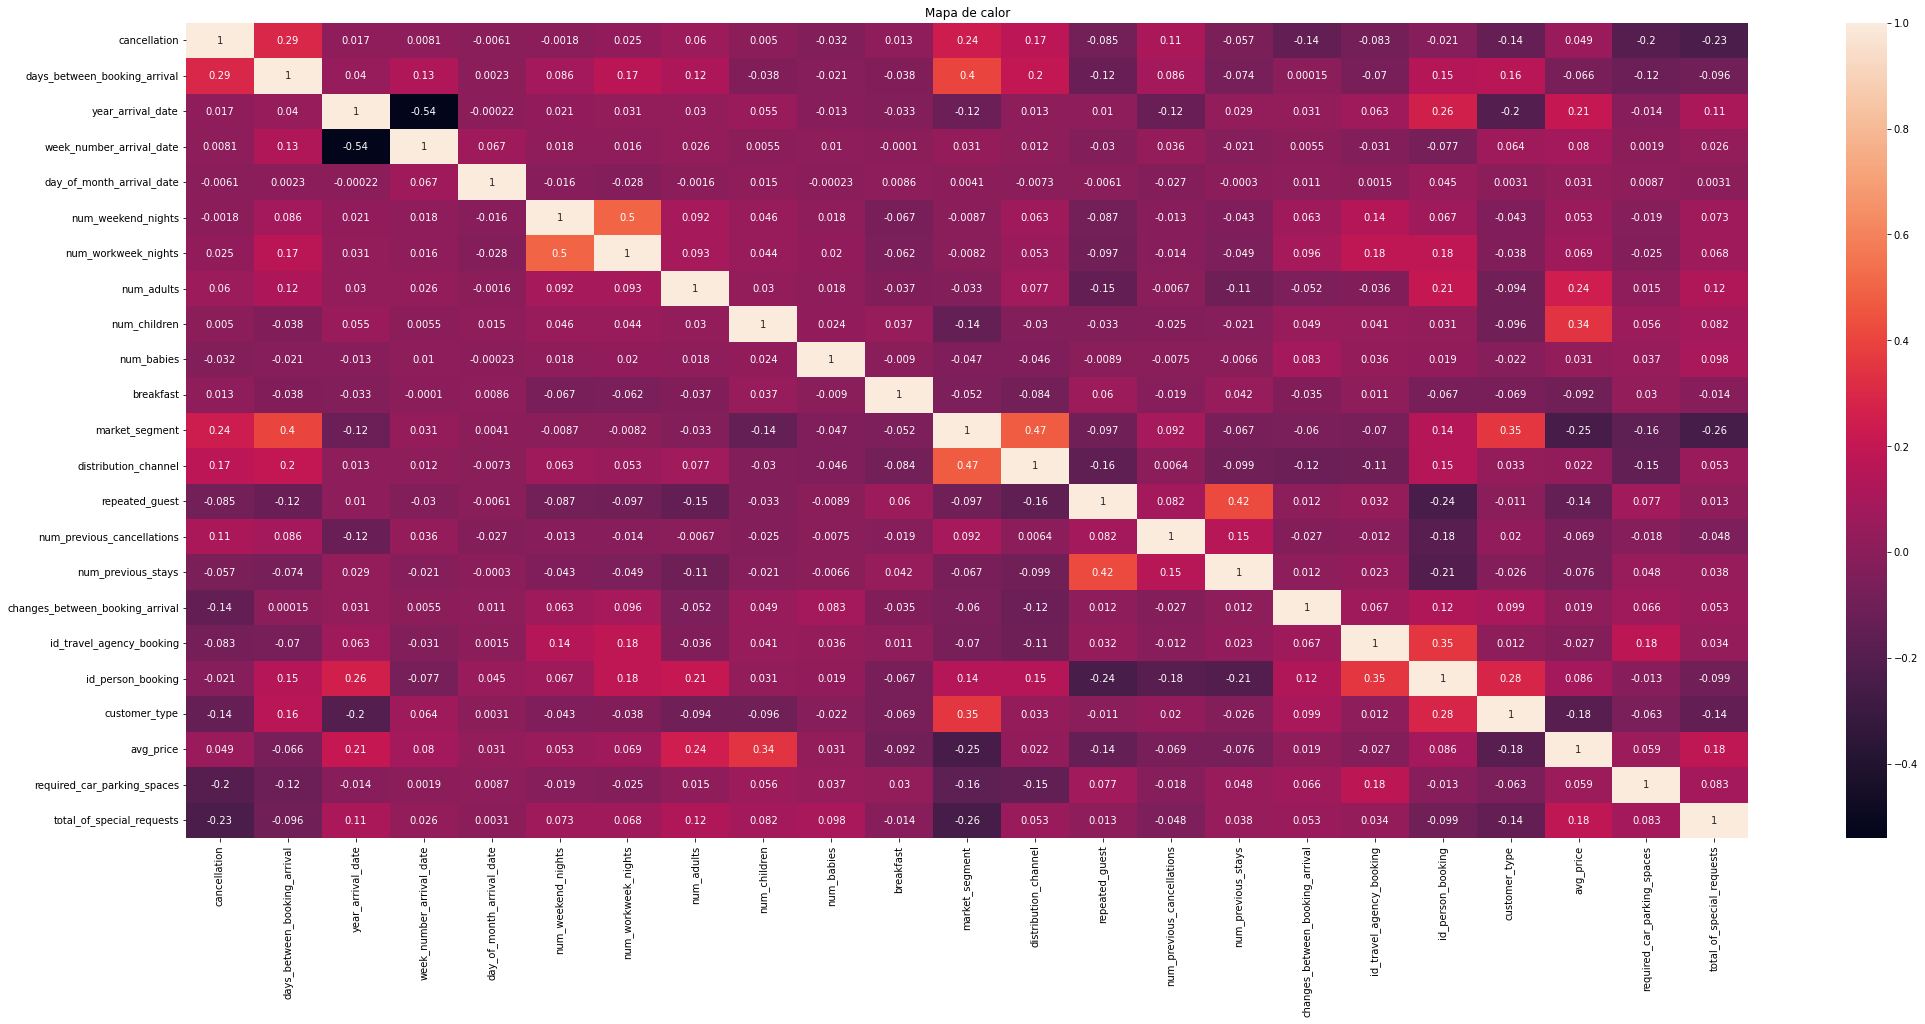

In [52]:
correlacao = df.corr()
plt.figure(figsize = (35,15))
mapa_calor = sns.heatmap(correlacao, annot=True)
#heatmap.set(xlabel=None)
mapa_calor.set(title='Mapa de calor')
#cancellation (days_between_booking_arrival:0,29, market_segment:0,24, total_of_special_requests:-0,23)

### a.2) Teste de Hipóteses envolvendo a variável cancellation e, pelo menos, outras duas variáveis presentes no dataset

##### Testando a variável Renda dias entre reserva chegada (days_between_booking_arrival)

In [53]:
results = mannwhitneyu(df['days_between_booking_arrival'], df['cancellation'])
results

MannwhitneyuResult(statistic=13658399165.0, pvalue=0.0)

#####  Testando a variável Renda segmento de mercado (market_segment)

In [54]:
results = mannwhitneyu(df['market_segment'], df['cancellation'])
results

MannwhitneyuResult(statistic=13105630018.0, pvalue=0.0)

#####  Testando a variável total de pedidos especiais (total_of_special_requests)

In [55]:
results = mannwhitneyu(df['total_of_special_requests'], df['cancellation'])
results

MannwhitneyuResult(statistic=7766774162.0, pvalue=0.0)

### a.3) Visualizações envolvendo a variável cancellation e, pelo menos, outras duas variáveis presentes no dataset

### a.3.1)  Preparando os dados para a vizualização:

In [56]:
#Traduzindo as colunas
df.rename(columns={'type': 'tipo',
                   'days_between_booking_arrival':'dias_entre_reserva_chegada',
                   'year_arrival_date':'ano_chegada_data',
                   'month_arrival_date':'mes_chegada_data',
                   'week_number_arrival_date':'num_da_semana_data_de_chegada',
                   'day_of_month_arrival_date':'dia_do_mes_data_de_chegada',
                   'num_weekend_nights':'num_fim_de_semana_noites',
                   'num_workweek_nights':'num_noites_da_semana_de_trabalho',
                   'num_adults':'num_adultos',
                   'num_children':'num_criancas',
                   'num_babies':'num_bebes',
                   'breakfast':'cafe_da_manha',
                   'country':'pais',
                   'market_segment':'segmento_de_mercado',
                   'distribution_channel':'canal_de_distribuição',
                   'repeated_guest':'convidado_repetido',
                   'num_previous_cancellations':'num_cancelamentos_anteriores',
                   'num_previous_stays':'num_anterior_estadias',
                   'reserved_room':'quarto_reservado',
                   'changes_between_booking_arrival':'alteracoes_entre_a_chegada_da_reserva',
                   'deposit_policy':'politica_de_deposito',
                   'id_travel_agency_booking':'id_reserva_de_agencia_de_viagens',
                   'id_person_booking':'reserva_de_pessoa_de_identificacao',
                   'customer_type':'tipo_de_cliente',
                   'avg_price':'preco_medio',
                   'required_car_parking_spaces':'vagas_estacionamento_obrigatorias',
                   'total_of_special_requests':'total_solicitacoes_especiais'
                  }, inplace=True)
#Verificando os dados nulos:
print(df.isnull().sum().sort_values(ascending=False))

#transformando a coluna cafe_da_manha e tipo para binário:
df["cafe_da_manha"] = df["cafe_da_manha"].astype(int)
def transformar_tipo(valor):
    if valor == 'Hotel':
        return 1
    else:
        return 0
df['tipo_bin']=df['tipo'].map(transformar_tipo)
df=df.drop(columns=["tipo"])

#excluindo os valores nulos da coluna número de crianças:
df = df[df['num_criancas'].notna()]

#excluindo as colunas reserva_de_pessoa_de_identificacao e
#id_reserva_de_agencia_de_viagens, muitos valores nulos
#e não significativos
df_filtro = df.drop(columns=["reserva_de_pessoa_de_identificacao",
                             "id_reserva_de_agencia_de_viagens"])

#Substituindo o nome do mês 
df_filtro['num_mes_chegada_data'] = df_filtro['mes_chegada_data'].map({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12},na_action=None)
df_filtro['num_mes_chegada_data']
df_filtro['data_completa'] = df_filtro['ano_chegada_data'].astype(str) + '-' + df_filtro['num_mes_chegada_data'].astype(str) + '-' + df_filtro['dia_do_mes_data_de_chegada'].astype(str)
df_filtro['data_completa'] = pd.to_datetime(df_filtro['data_completa'])

#Convertendo os valores no dataframe para str para gerar os gráficos
df_filtro_gr = df_filtro
df_filtro_gr = df_filtro_gr.applymap(str)
df_filtro_gr['cancellation']=df_filtro_gr['cancellation'].astype(int)


def gerar_gr(dataframe,titulo,elemento,valor,operacao):
    df_filtro=pd.pivot_table(dataframe,index=[elemento], values=valor, aggfunc=operacao).sort_values(ascending=False,by=valor)[:12]
    df_filtro.index = df_filtro.index.astype(object)
    prods = [s.strip() for s in df_filtro.index.tolist()]
    df_filtro['Product line'] = df_filtro.index
    resposta = df_filtro['Product line'].iloc[0]
    fig = px.bar(df_filtro, x=prods, y=df_filtro[valor], title =titulo + "   R: " +resposta,text = valor)
    fig.update_layout(xaxis_title=elemento)
    cores = ['gray','blue','green','purple']
    cor = random.choice(cores)
    fig.update_traces(marker_color=cor)
    fig.update_traces(textposition='inside',texttemplate='%{text:.4s}')
    fig.show()

reserva_de_pessoa_de_identificacao       112593
id_reserva_de_agencia_de_viagens          16340
pais                                        488
num_criancas                                  4
tipo                                          0
canal_de_distribuição                         0
vagas_estacionamento_obrigatorias             0
preco_medio                                   0
tipo_de_cliente                               0
politica_de_deposito                          0
alteracoes_entre_a_chegada_da_reserva         0
quarto_reservado                              0
num_anterior_estadias                         0
num_cancelamentos_anteriores                  0
convidado_repetido                            0
segmento_de_mercado                           0
cancellation                                  0
cafe_da_manha                                 0
num_bebes                                     0
num_adultos                                   0
num_noites_da_semana_de_trabalho        

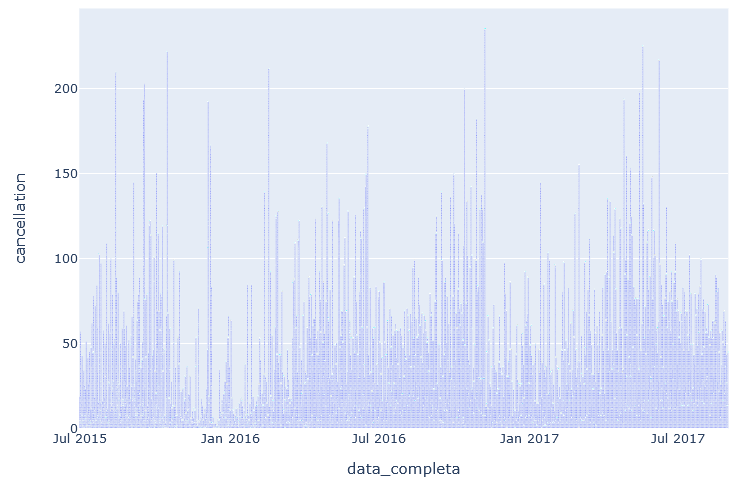

In [74]:
##Falta de processamento na minha máquina
#import plotly.express as px
#fig = px.bar(df_filtro, x=df_filtro['data_completa'], y=df_filtro['cancellation'])
#fig.show()
Image(filename='Histograma de cancelamentos.png') 

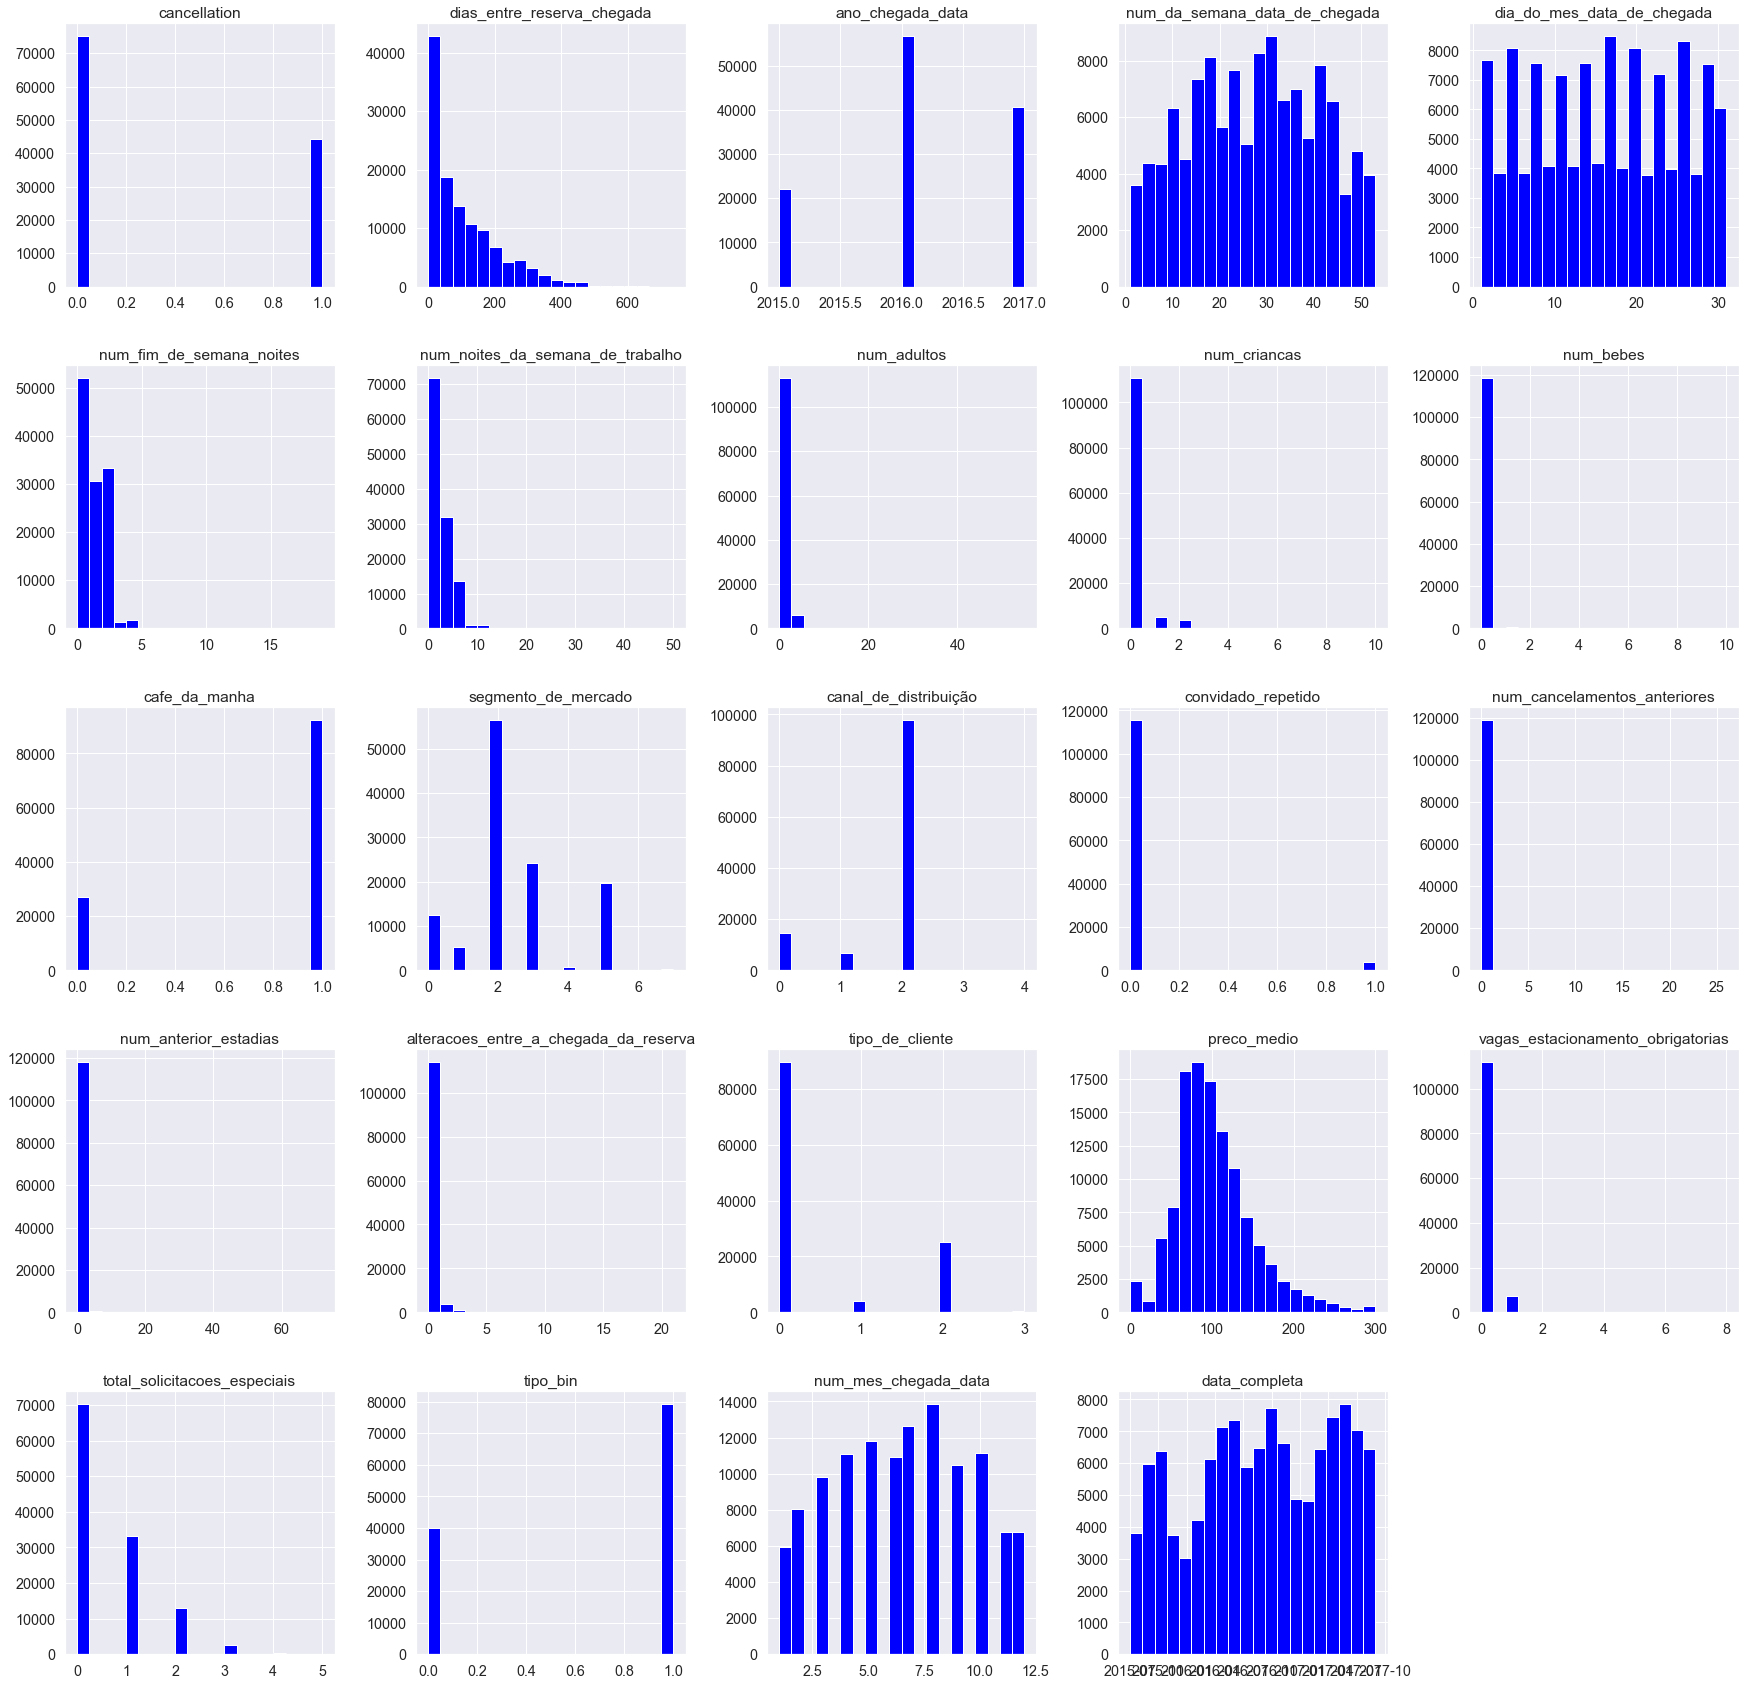

In [58]:
sns.set( font_scale=1.3, rc={ 'figure.figsize':(30,30) } )
eixo = df_filtro.hist( bins=20, color='blue')

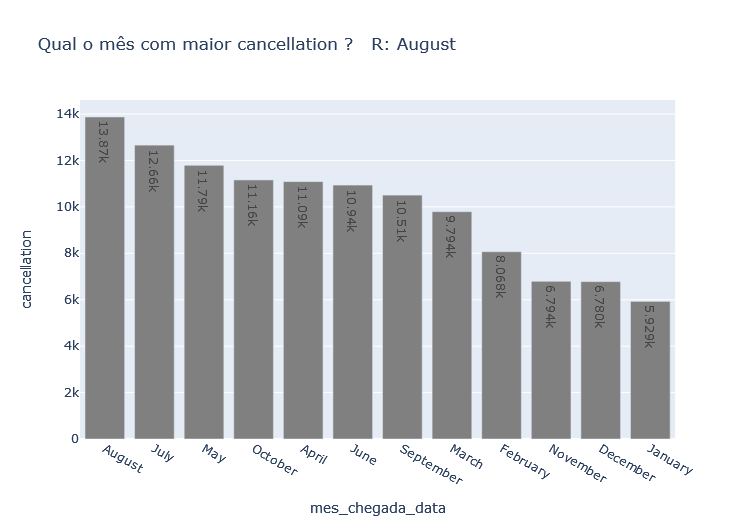

In [67]:
gerar_gr(df_filtro_gr,'Qual o mês com maior cancellation ?','mes_chegada_data','cancellation','count')
Image(filename='Qual o mês com maior cancellation.png') 

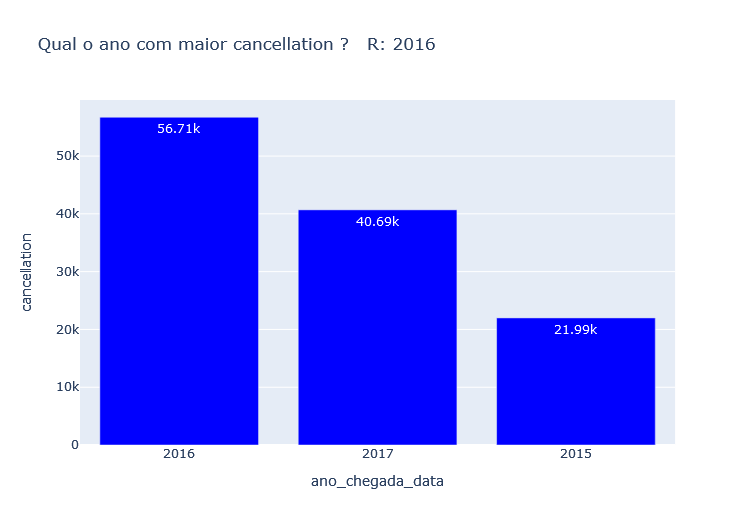

In [68]:
gerar_gr(df_filtro_gr,'Qual o ano com maior cancellation ?','ano_chegada_data','cancellation','count')
Image(filename='Qual o ano com maior cancellation.png') 

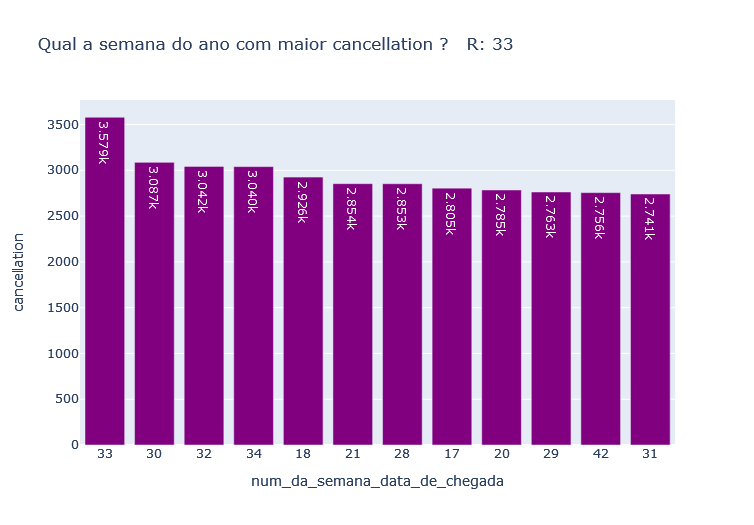

In [69]:
gerar_gr(df_filtro_gr,'Qual a semana do ano com maior cancellation ?','num_da_semana_data_de_chegada','cancellation','count')
Image(filename='Qual a semana do ano com maior cancellation.png') 

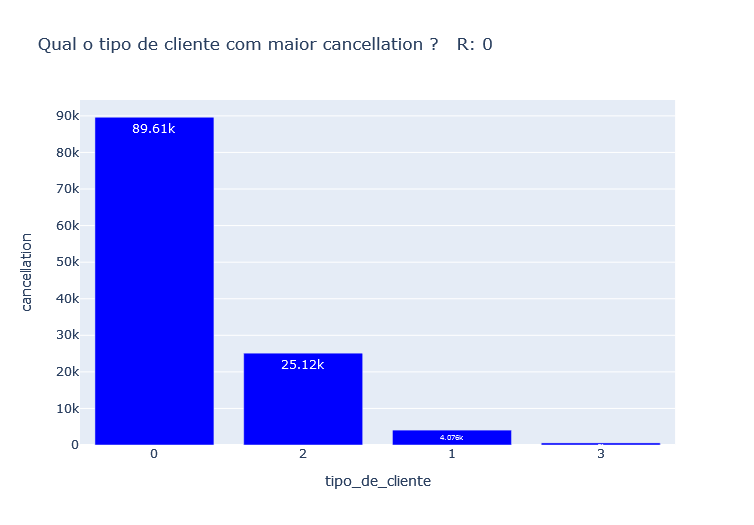

In [70]:
gerar_gr(df_filtro_gr,'Qual o tipo de cliente com maior cancellation ?','tipo_de_cliente','cancellation','count')
Image(filename='Qual o tipo de cliente com maior cancellation.png') 

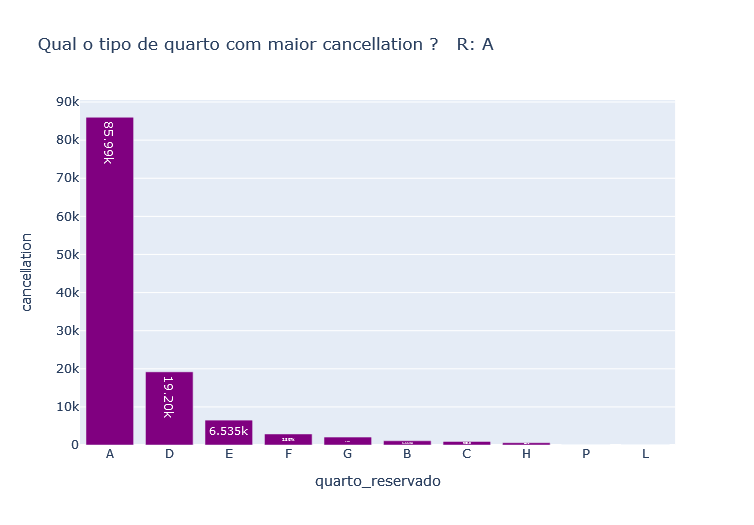

In [71]:
gerar_gr(df_filtro_gr,'Qual o tipo de quarto com maior cancellation ?','quarto_reservado','cancellation','count')
Image(filename='Qual o tipo de quarto com maior cancellation.png') 

## b)  Desenvolva  um  modelo  preditivo  de  classificação  para  identificar  cancelamentos  e  utilize métricas adequadas para argumentar a efetividade do modelo; 

###  <font color='green'>O modelo que teve a melhor performace foi o de árvore aletória pura, sem ajustes de validação cruzada, pois ele funciona a base de entropia, ou seja pelo seu cálculo interno ele sabe que rumo chegar em relação a cada parâmetro, métricas para a efetividade são treino e teste</font>

### b.1)  Ajustes dos dados para o modelo; 

In [161]:
#O dataset possui 177 países, é necessário a retirada da coluna 
#para o modelo performar melhor.
occur = df_filtro.groupby(['pais']).size()
display(occur)
df_filtro = df_filtro.drop(columns=["pais"])

#one hot encolding nas colunas politica_de_deposito, quarto_reservado
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_filtro[['politica_de_deposito']]).toarray())
df_filtro = df_filtro.join(encoder_df)
#excluindo os valores nulos:
df_filtro = df_filtro[df_filtro[0].notna()]
df_filtro
df_filtro = df_filtro.rename(columns={0: 'No Deposit', 1:'Non Refund', 2:'Refundable'})

occur = df_filtro.groupby(['quarto_reservado']).size()
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_filtro[['quarto_reservado']]).toarray())
df_filtro = df_filtro.join(encoder_df)
#excluindo os valores nulos:
df_filtro = df_filtro[df_filtro[0].notna()]
df_filtro
df_filtro = df_filtro.rename(columns={0: 'A', 1:'B', 2:'C',
                                     3: 'D', 4:'E', 5:'F',
                                     6: 'G', 7:'H', 8:'L',
                                     9: 'P'})

pais
ABW      2
AGO    362
AIA      1
ALB     12
AND      7
      ... 
VGB      1
VNM      8
ZAF     80
ZMB      2
ZWE      4
Length: 177, dtype: int64

In [162]:
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119378 entries, 0 to 119381
Data columns (total 40 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   cancellation                           119378 non-null  int64         
 1   dias_entre_reserva_chegada             119378 non-null  int64         
 2   ano_chegada_data                       119378 non-null  int64         
 3   mes_chegada_data                       119378 non-null  object        
 4   num_da_semana_data_de_chegada          119378 non-null  int64         
 5   dia_do_mes_data_de_chegada             119378 non-null  int64         
 6   num_fim_de_semana_noites               119378 non-null  int64         
 7   num_noites_da_semana_de_trabalho       119378 non-null  int64         
 8   num_adultos                            119378 non-null  int64         
 9   num_criancas                           119378 no

In [163]:
#mes_chegada_data                       119378 non-null  object
#quarto_reservado                       119378 non-null  object
#politica_de_deposito                   119378 non-null  object

X = df_filtro.drop(columns=["mes_chegada_data","quarto_reservado",
                           "politica_de_deposito","cancellation","data_completa"])

y = df_filtro['cancellation']

### b.2)  Desenvolvimento do modelo; 

In [164]:
! Pip install sklearn
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier -  Utilizado para a criação do modelo de ML
from sklearn.model_selection import train_test_split
# para fazer a separação de uma parte dos dados para treino e outra para teste 
from sklearn.metrics import accuracy_score
# Utilizado para ver a precisão do modelo 
from sklearn.metrics import plot_confusion_matrix
# Utilizado para gerar o grafico de uma matriz de confusão do modelo 
from sklearn.model_selection import GridSearchCV
# Utilizado para encontrar os melhores valores para os hiperparâmetros
from sklearn.model_selection import cross_validate
# Utilizado para fazer validação cruzada do modelo 
from sklearn.model_selection import GroupKFold
# Utilizado para separar por grupos na hora de treinar o modelo
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

##### <font color='red' style='font-size: 30px;'>Árvore de decisão</font>
<hr style='border: 2px solid red;'>

In [72]:
cv=GroupKFold(n_splits=10)
#criado uma divisão com 10 grupos nos dados 
modelo_arvore = DecisionTreeClassifier(random_state = 2)
# criado um modelo de arvore de decisão
resultados=cross_validate(modelo_arvore,X,y,cv=cv,groups=df_filtro.dias_entre_reserva_chegada)
# Criado a validação cruzada utilizando o modelo o x e o y do dataset todo e definido a coluna idade para ser o grupo 
media =resultados['test_score'].mean()
desvio_padrao=resultados['test_score'].std()
print(f'accuracy = [{((media - 2* desvio_padrao)*100).round(2)} , {((media+2*desvio_padrao)*100).round(2)}]')
# Encontrado o periodo em que se encontra a precisão do modelo

accuracy = [72.2 , 81.12]


In [73]:
espaco_de_parametros = {"max_depth" : range(1,8,1),
                        "min_samples_split" : range(2,8,1),
                        "min_samples_leaf" : range(2,8,1),
                        "criterion" : ["gini", "entropy"],
                        "max_leaf_nodes":range(2,8,1)}
cv=GroupKFold(n_splits=5)
busca = GridSearchCV(DecisionTreeClassifier(random_state = 2),
                    espaco_de_parametros,
                    cv = cv)
busca.fit(X, y, groups = df_filtro.dias_entre_reserva_chegada)
resultados = pd.DataFrame(busca.cv_results_)
busca.best_estimator_
#criado valores para se testar em cada parametro
#escolhido quantos grupos vão ser utilizados 
#criado o gridsearch
#realizado o treinamento com os valores para cada parametro
#retornado o melhor modelo encontrado dentro desses parametros

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=7, min_samples_leaf=2,
                       random_state=2)

In [74]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [75]:
modelo_ajustado = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0,min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
modelo_ajustado.fit(X_train, y_train)
# Treinado um novo modelo de ML com a arvore de decisão com os parametros encontrados como adequados

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=7, min_samples_leaf=2)

In [76]:
accuracy =(modelo_ajustado.score(X_test,y_test)*100).round(2)
print(accuracy.round(2), "%")

77.74 %


##### <font color='red' style='font-size: 30px;'>Floresta aleatória</font>
<hr style='border: 2px solid red;'>

In [166]:
clf = RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [167]:
modelo_floresta = RandomForestClassifier(random_state = 2)
modelo_floresta.fit(X_train, y_train)
accuracy =(modelo_floresta.score(X_test,y_test)*100).round(2)
print(accuracy.round(2), "%")

86.96 %


In [79]:
cv=GroupKFold(n_splits=10)
#criado uma divisão com 10 grupos nos dados 
modelo_ajustado_floresta = RandomForestClassifier(random_state = 2)
# criado um modelo de arvore de decisão
resultados=cross_validate(modelo_ajustado_floresta,X,y,cv=cv,groups=df_filtro.dias_entre_reserva_chegada)
# Criado a validação cruzada utilizando o modelo o x e o y do dataset todo e definido a coluna idade para ser o grupo 
media =resultados['test_score'].mean()
desvio_padrao=resultados['test_score'].std()
print(f'accuracy = [{((media - 2* desvio_padrao)*100).round(2)} , {((media+2*desvio_padrao)*100).round(2)}]')
# Encontrado o periodo em que se encontra a precisão do modelo

accuracy = [79.07 , 87.18]


In [80]:
# create random grid
from sklearn.model_selection import RandomizedSearchCV
espaco_de_parametros_floresta = {
 'n_estimators': range(1,55,1),
 'max_features': range(2,55,1),
 'max_depth': range(2,55,1)
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(RandomForestClassifier(random_state = 2), espaco_de_parametros_floresta)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\marco\anaconda3\lib\site-packages\jo

{'n_estimators': 24, 'max_features': 19, 'max_depth': 37}


In [172]:
modelo_ajustado_floresta = RandomForestClassifier(n_estimators=24,
                                    max_features=19,
                                    max_depth=37,random_state = 2)
modelo_ajustado_floresta.fit (X_train, y_train)

RandomForestClassifier(max_depth=37, max_features=19, n_estimators=24,
                       random_state=2)

In [89]:
accuracy =(modelo_ajustado_floresta.score(X_test, y_test)*100).round(2)
print(accuracy.round(2), "%")

75.86 %


## c)  Ao realizar a validação cruzada do modelo de classificação, discuta sobre as diferenças entre utilizar uma separação entre treino e teste aleatória e uma separação temporal (Ex: treino em 2015 e 2016 e validação em 2017). Os resultados são diferentes? Qual o mais indicado?

###  <font color='green'>Os resultados são diferentes, o modelo que performou melhor foi o de separação temporal (77.6 %), via de regra que sempre é indicado separar as linhas aleatóriamente 80% para treino e 20% para teste que performou (77.46 %). Já no modelo separado por anos o treino e teste foram treinados 66% dos dados e 34% para teste. A melhor indicação é separar os dados de treino e teste aleatóriamente, para não resultar em overfiting (quando o modelo vicia nos resultados, ele não aprende e apenas decora), em modelos de previsão 'numérica', já em séries temporais é sempre ideal manter a ordem dos dados para treino e teste, pois será analisado padrões ao longo do tempo, cada coeficiente de derivação (taxa de variação instantânea) será analisada pelo modelo de IA</font>

In [174]:
df_ordenado = df_filtro.sort_values(by='data_completa')
df_filtro_2015_2016 = df_filtro.query('ano_chegada_data < 2017')
X_train = df_filtro_2015_2016.drop(columns=["mes_chegada_data","quarto_reservado",
                           "politica_de_deposito","cancellation","data_completa"])
y_train = df_filtro_2015_2016['cancellation']

df_filtro_2017 = df_filtro.query('ano_chegada_data == 2017')
X_test = df_filtro_2017.drop(columns=["mes_chegada_data","quarto_reservado",
                           "politica_de_deposito","cancellation","data_completa"])
y_test = df_filtro_2017['cancellation']

In [175]:
# Modelo separado por ordem de ano
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
modelo_floresta = RandomForestClassifier()
modelo_floresta.fit(X_train, y_train)
accuracy =(modelo_floresta.score(X_test, y_test)*100).round(2)
print(accuracy.round(2), "%")

77.6 %


In [176]:
#Melhor modelo da floresta aleatória
modelo_floresta = RandomForestClassifier(random_state = 2)
modelo_floresta.fit(X_train, y_train)
accuracy =(modelo_floresta.score(X_test,y_test)*100).round(2)
print(accuracy.round(2), "%")

77.46 %


In [177]:
#df_filtro_2017['cancellation'] #40679 linhas
#df_filtro_2015_2016['cancellation'] #78699
#40679/(40679+78699) #0.34075792859655885
#1 -0.34075792859655885 #1 -0.34075792859655885